In [1]:
import pandas as pd

In [2]:
fuel_data = pd.read_csv('fuel_data.csv')

In [3]:
import numpy as np

In [4]:
fuel_data['plant_name_ferc1'].nunique()

2315

In [19]:
fuel_data['fuel_unit'].fillna('mcf', inplace = True)

In [6]:
fuel_data.head(10)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590000,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592000,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130000,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950000,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000000,2.77,2.77,2.570
5,f1_fuel_1994_12_2_0_13,2,1994,e. c. gaston-unit 5,coal,ton,2124933.0,23.922000,44.24,43.25,1.850
6,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,nuclear,kgU,2260.0,0.064094,28.77,0.00,0.450
7,f1_fuel_1994_12_2_1_10,2,1994,resondent's portion,coal,ton,5372133.0,24.840000,58.54,55.13,2.360
8,f1_fuel_1994_12_2_2_10,2,1994,respondent's portion,coal,ton,817520.0,24.290000,33.97,34.65,1.400
9,f1_fuel_1994_12_4_0_1,4,1994,units 1-3,coal,ton,1471233.0,22.484000,28.73,28.11,1.278


In [7]:
fuel_data.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [8]:
fuel_data['total_fuel_cost'] = fuel_data['fuel_qty_burned'] * fuel_data['fuel_cost_per_unit_burned']

In [9]:
fuel_data['Total_energy_gen'] = fuel_data['']

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,total_fuel_cost
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121,9.996752e+07
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120,1.948474e+08
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650,1.183133e+08
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970,1.765410e+08
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570,1.122764e+05


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
%matplotlib inline

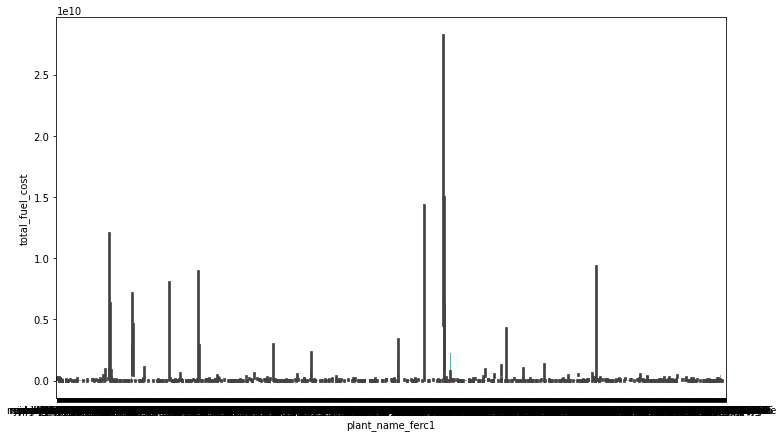

In [12]:
plt.figure(figsize = (12,7))
sns.barplot(data=fuel_data, x='plant_name_ferc1',y='total_fuel_cost')

In [13]:
import plotly.graph_objs as go
from  plotly.offline import plot
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline()
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected='true')

In [14]:
fuel_data.iplot(kind='bar',x='plant_name_ferc1',y='total_fuel_cost',barmode='group')

In [20]:
df = pd.read_csv('https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv')

In [22]:
df['fuel_unit'].isnull().sum()

180